# 6.2 Exploring relationships
## EU estimated agricultural balance sheets

## This script contains the following:

### 1. Importing Visualization Libraries and Data
### 2. Merging Additional Data
### 3. Data Cleaning  and Consistency Check
### 4. Creating subsets for future analysis
### 5. Exploring Relationships
     Correlations
     Scatterplots
     Pair Plots
     Categorical Plots
### 6. Revise the Questions
### 7. Define hypotheses

### 1. Importing Visualization Libraries and Data

In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import os

In [2]:
# create a path

path = r'C:\Users\apiny\Documents\CareerFoundry\Data Immersion\6_Advanced Analytics\EU_agriculture'

In [3]:
# import a dataframe

df = pd.read_excel(os.path.join(path,'02 Data', 'Prepared Data', 'A6 Raw data.xlsx'), sheet_name='cleaned_data')

In [4]:
df.head()

,Country,Commodity,Commodity (Type),Year,Exports (Extra-EU) (THOUSAND TONS),Exports (Intra-EU) (THOUSAND TONS),Exports (Extra-EU) (THOUSAND HECTOLITRES),Exports (Intra-EU) (THOUSAND HECTOLITRES),Imports (Extra-EU) (THOUSAND TONS),Imports (Intra-EU) (THOUSAND TONS),...,Live imports (Extra-EU) (THOUSAND TONS (CARCASS WEIGHT EQ.)),Live imports (Intra-EU) (THOUSAND TONS (CARCASS WEIGHT EQ.)),Meat exports (Extra-EU) (THOUSAND TONS (CARCASS WEIGHT EQ.)),Meat exports (Intra-EU) (THOUSAND TONS (CARCASS WEIGHT EQ.)),Meat imports (Extra-EU) (THOUSAND TONS (CARCASS WEIGHT EQ.)),Meat imports (Intra-EU) (THOUSAND TONS (CARCASS WEIGHT EQ.)),Net production (THOUSAND HEAD),Net production (THOUSAND TONS (CARCASS WEIGHT EQ.)),Population (THOUSAND HEAD),Production (THOUSAND TONS)
0,Austria,ACIDIFIED MILK,DAIRY,2002,0.4674,64.8472,NaN,NaN,0.0768,14.158641,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Austria,ACIDIFIED MILK,DAIRY,2003,0.7849,81.6189,NaN,NaN,0.0298,19.601460,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Austria,ACIDIFIED MILK,DAIRY,2004,1.6431,94.5393,NaN,NaN,0.0081,20.401765,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Austria,ACIDIFIED MILK,DAIRY,2005,1.5528,105.2454,NaN,NaN,0.0287,19.719400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Austria,ACIDIFIED MILK,DAIRY,2006,6.1842,119.3792,NaN,NaN,0.0283,24.254256,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.describe

<bound method NDFrame.describe of           Country       Commodity Commodity (Type)  Year  \
0         Austria  ACIDIFIED MILK            DAIRY  2002   
1         Austria  ACIDIFIED MILK            DAIRY  2003   
2         Austria  ACIDIFIED MILK            DAIRY  2004   
3         Austria  ACIDIFIED MILK            DAIRY  2005   
4         Austria  ACIDIFIED MILK            DAIRY  2006   
...           ...             ...              ...   ...   
46516  Luxembourg        RAW MILK         RAW MILK  2018   
46517  Luxembourg        RAW MILK         RAW MILK  2019   
46518  Luxembourg        RAW MILK         RAW MILK  2020   
46519  Luxembourg        RAW MILK         RAW MILK  2021   
46520  Luxembourg        RAW MILK         RAW MILK  2022   

       Exports (Extra-EU) (THOUSAND TONS)  Exports (Intra-EU) (THOUSAND TONS)  \
0                                  0.4674                             64.8472   
1                                  0.7849                             81.6189   
2 

In [6]:
df.dtypes

Country                                                          object
Commodity                                                        object
Commodity (Type)                                                 object
Year                                                              int64
Exports (Extra-EU) (THOUSAND TONS)                              float64
Exports (Intra-EU) (THOUSAND TONS)                              float64
Exports (Extra-EU) (THOUSAND HECTOLITRES)                       float64
Exports (Intra-EU) (THOUSAND HECTOLITRES)                       float64
Imports (Extra-EU) (THOUSAND TONS)                              float64
Imports (Intra-EU) (THOUSAND TONS)                              float64
Imports (Extra-EU) (THOUSAND HECTOLITRES)                       float64
Imports (Intra-EU) (THOUSAND HECTOLITRES)                       float64
Live exports (Extra-EU) (THOUSAND TONS (CARCASS WEIGHT EQ.))    float64
Live exports (Intra-EU) (THOUSAND TONS (CARCASS WEIGHT EQ.))    

### 2. Merging Additional Data

In [7]:
# import a dataframe of area of each EU country

df_area = pd.read_excel(os.path.join(path,'02 Data', 'Original Data', 'EUCountry area.xlsx'))

In [8]:
df_area

,Country in Europe,area (sq km)
0,France,643801
1,Spain,505370
2,Sweden,450295
3,Germany,357022
4,Finland,338145
5,Poland,312685
6,Italy,301340
7,Romania,238391
8,Greece,131957
9,Bulgaria,110879


In [9]:
# rename the column name

df_area.rename(columns ={'Country in Europe':'Country'}, inplace=True)
df_area.rename(columns ={'area (sq km)':'Area (SQ.KM.)'}, inplace=True)

In [10]:
df_area.head()

,Country,Area (SQ.KM.)
0,France,643801
1,Spain,505370
2,Sweden,450295
3,Germany,357022
4,Finland,338145


In [11]:
# merge the dataframe to get area data based on the country column

df_area_merged = pd.merge(df, df_area, on= 'Country')

In [12]:
df_area_merged.head()

,Country,Commodity,Commodity (Type),Year,Exports (Extra-EU) (THOUSAND TONS),Exports (Intra-EU) (THOUSAND TONS),Exports (Extra-EU) (THOUSAND HECTOLITRES),Exports (Intra-EU) (THOUSAND HECTOLITRES),Imports (Extra-EU) (THOUSAND TONS),Imports (Intra-EU) (THOUSAND TONS),...,Live imports (Intra-EU) (THOUSAND TONS (CARCASS WEIGHT EQ.)),Meat exports (Extra-EU) (THOUSAND TONS (CARCASS WEIGHT EQ.)),Meat exports (Intra-EU) (THOUSAND TONS (CARCASS WEIGHT EQ.)),Meat imports (Extra-EU) (THOUSAND TONS (CARCASS WEIGHT EQ.)),Meat imports (Intra-EU) (THOUSAND TONS (CARCASS WEIGHT EQ.)),Net production (THOUSAND HEAD),Net production (THOUSAND TONS (CARCASS WEIGHT EQ.)),Population (THOUSAND HEAD),Production (THOUSAND TONS),Area (SQ.KM.)
0,Austria,ACIDIFIED MILK,DAIRY,2002,0.4674,64.8472,NaN,NaN,0.0768,14.158641,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83871
1,Austria,ACIDIFIED MILK,DAIRY,2003,0.7849,81.6189,NaN,NaN,0.0298,19.601460,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83871
2,Austria,ACIDIFIED MILK,DAIRY,2004,1.6431,94.5393,NaN,NaN,0.0081,20.401765,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83871
3,Austria,ACIDIFIED MILK,DAIRY,2005,1.5528,105.2454,NaN,NaN,0.0287,19.719400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83871
4,Austria,ACIDIFIED MILK,DAIRY,2006,6.1842,119.3792,NaN,NaN,0.0283,24.254256,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83871


In [13]:
# import a dataframe of EU population(2002-2021)

df_population21 = pd.read_excel(os.path.join(path,'02 Data',  'Original Data', 'Demographic_UN_2022.xlsx'), sheet_name='Estimates', header=16)

In [14]:
df_population21.head()

,Index,Variant,"Region, subregion, country or area *",Notes,Location code,ISO3 Alpha-code,ISO2 Alpha-code,SDMX code**,Type,Parent code,...,"Male Mortality before Age 60 (deaths under age 60 per 1,000 male live births)","Female Mortality before Age 60 (deaths under age 60 per 1,000 female live births)","Mortality between Age 15 and 50, both sexes (deaths under age 50 per 1,000 alive at age 15)","Male Mortality between Age 15 and 50 (deaths under age 50 per 1,000 males alive at age 15)","Female Mortality between Age 15 and 50 (deaths under age 50 per 1,000 females alive at age 15)","Mortality between Age 15 and 60, both sexes (deaths under age 60 per 1,000 alive at age 15)","Male Mortality between Age 15 and 60 (deaths under age 60 per 1,000 males alive at age 15)","Female Mortality between Age 15 and 60 (deaths under age 60 per 1,000 females alive at age 15)",Net Number of Migrants (thousands),"Net Migration Rate (per 1,000 population)"
0,1,Estimates,WORLD,NaN,900,NaN,NaN,1.0,World,0,...,580.75,498.04,240.316,271.625,208.192,378.697,430.259,324.931,0,0
1,2,Estimates,WORLD,NaN,900,NaN,NaN,1.0,World,0,...,566.728,490.199,231.177,258.09,203.78,368.319,415.836,319.336,0,0
2,3,Estimates,WORLD,NaN,900,NaN,NaN,1.0,World,0,...,546.317,477.264,218.674,240.034,197.142,353.055,395.533,309.91,0,0
3,4,Estimates,WORLD,NaN,900,NaN,NaN,1.0,World,0,...,535.829,469.532,212.872,232.602,193.049,345.083,385.843,303.905,0,0
4,5,Estimates,WORLD,NaN,900,NaN,NaN,1.0,World,0,...,523.124,458.484,205.762,224.05,187.444,335.442,374.658,295.994,0,0


In [15]:
# rename a column name

df_population21.rename(columns={'Region, subregion, country or area *':'Country'}, inplace=True)
df_population21.rename(columns={'Total Population, as of 1 January (thousands)':'Total Population (THOUSAND PEOPLE)'}, inplace=True)

In [16]:
df_population21[['Country','Year','Total Population (THOUSAND PEOPLE)']].head()

,Country,Year,Total Population (THOUSAND PEOPLE)
0,WORLD,1950.0,2477674.732
1,WORLD,1951.0,2520969.582
2,WORLD,1952.0,2565291.179
3,WORLD,1953.0,2615250.618
4,WORLD,1954.0,2665306.975


In [17]:
df_population21.shape

(20596, 65)

In [18]:
# import a dataframe of EU population(2022)

df_population22 = pd.read_excel(os.path.join(path,'02 Data', 'Original Data', 'Demographic_UN_2022.xlsx'), sheet_name='Medium variant', header=16)

In [19]:
# rename a column name

df_population22.rename(columns={'Region, subregion, country or area *':'Country'}, inplace=True)
df_population22.rename(columns={'Total Population, as of 1 January (thousands)':'Total Population (THOUSAND PEOPLE)'}, inplace=True)

In [20]:
df_population22[['Country','Year','Total Population (THOUSAND PEOPLE)']].head()

,Country,Year,Total Population (THOUSAND PEOPLE)
0,WORLD,2022.0,7941658.316
1,WORLD,2023.0,8008551.995
2,WORLD,2024.0,8082070.9
3,WORLD,2025.0,8155601.099
4,WORLD,2026.0,8228375.807


In [21]:
df_population22.shape

(22598, 65)

In [22]:
# concatenate the EU population data (2002-2022)

frames = [df_population21, df_population22]

In [23]:
df_population_concat = pd.concat(frames, axis=0)

In [24]:
df_population_concat[['Country','Year','Total Population (THOUSAND PEOPLE)']].tail()

,Country,Year,Total Population (THOUSAND PEOPLE)
22593,Wallis and Futuna Islands,2096.0,10.111
22594,Wallis and Futuna Islands,2097.0,10.063
22595,Wallis and Futuna Islands,2098.0,10.009
22596,Wallis and Futuna Islands,2099.0,9.969
22597,Wallis and Futuna Islands,2100.0,9.911


In [25]:
df_population_concat.shape

(43194, 65)

In [26]:
# merge the dataframe to get population data based on the country and year columns

df_area_pop_merged = pd.merge(df_area_merged, df_population_concat[['Country', 'Year','Total Population (THOUSAND PEOPLE)']], on= ['Country', 'Year'], how='left')

In [27]:
df_area_pop_merged.tail()

,Country,Commodity,Commodity (Type),Year,Exports (Extra-EU) (THOUSAND TONS),Exports (Intra-EU) (THOUSAND TONS),Exports (Extra-EU) (THOUSAND HECTOLITRES),Exports (Intra-EU) (THOUSAND HECTOLITRES),Imports (Extra-EU) (THOUSAND TONS),Imports (Intra-EU) (THOUSAND TONS),...,Meat exports (Extra-EU) (THOUSAND TONS (CARCASS WEIGHT EQ.)),Meat exports (Intra-EU) (THOUSAND TONS (CARCASS WEIGHT EQ.)),Meat imports (Extra-EU) (THOUSAND TONS (CARCASS WEIGHT EQ.)),Meat imports (Intra-EU) (THOUSAND TONS (CARCASS WEIGHT EQ.)),Net production (THOUSAND HEAD),Net production (THOUSAND TONS (CARCASS WEIGHT EQ.)),Population (THOUSAND HEAD),Production (THOUSAND TONS),Area (SQ.KM.),Total Population (THOUSAND PEOPLE)
46516,Sweden,OTHER OLIVE OIL,SPECIALISED CROPS,2022,0.013160,0.015513,NaN,NaN,0.064814,1.211231,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,450295,10517.669
46517,Sweden,TOTAL OLIVE OIL (OLIVES FOR OIL),SPECIALISED CROPS,2022,0.030933,0.128711,NaN,NaN,0.264915,10.284927,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,450295,10517.669
46518,Sweden,VIRGIN OTHER THAN LAMPANTE OLIVE OIL,SPECIALISED CROPS,2002,0.000000,0.000000,NaN,NaN,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,450295,8910.203
46519,Sweden,VIRGIN OTHER THAN LAMPANTE OLIVE OIL,SPECIALISED CROPS,2003,0.000000,0.000000,NaN,NaN,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,450295,8941.821
46520,Sweden,VIRGIN OTHER THAN LAMPANTE OLIVE OIL,SPECIALISED CROPS,2022,0.003204,0.005215,NaN,NaN,0.095264,0.628155,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,450295,10517.669


In [28]:
df_area_pop_merged.shape

(46521, 26)

In [29]:
# aggregate the 'Total Exports (THOUSAND TONS)' column

df_area_pop_merged['Total Exports (THOUSAND TONS)'] = df_area_pop_merged.loc[df_area_pop_merged['Commodity (Type)']. isin(['CEREAL','TOMATOES','DAIRY','APPLES','ORANGES','OILSEED','SPECIALISED CROPS','PEACHES AND NECTARINES']),'Total Exports (THOUSAND TONS)'] = df_area_pop_merged['Exports (Extra-EU) (THOUSAND TONS)'] + df_area_pop_merged['Exports (Intra-EU) (THOUSAND TONS)'] 

In [30]:
# aggregate the 'Total Imports (THOUSAND TONS)' column

df_area_pop_merged['Total Imports (THOUSAND TONS)'] = df_area_pop_merged.loc[df_area_pop_merged['Commodity (Type)']. isin(['CEREAL','TOMATOES','DAIRY','APPLES','ORANGES','OILSEED','SPECIALISED CROPS','PEACHES AND NECTARINES']),'Total Imports (THOUSAND TONS)'] = df_area_pop_merged['Imports (Extra-EU) (THOUSAND TONS)'] + df_area_pop_merged['Imports (Intra-EU) (THOUSAND TONS)'] 

In [31]:
# aggregate the 'Total Exports (THOUSAND HECTOLITRES)' column

df_area_pop_merged['Total Exports (THOUSAND HECTOLITRES)'] = df_area_pop_merged.loc[df_area_pop_merged['Commodity (Type)']. isin(['SPECIALISED CROPS']),'Total Exports (THOUSAND HECTOLITRES)'] = df_area_pop_merged['Exports (Extra-EU) (THOUSAND HECTOLITRES)'] + df_area_pop_merged['Exports (Intra-EU) (THOUSAND HECTOLITRES)']

In [32]:
# aggregate the 'Total Imports (THOUSAND HECTOLITRES)' column

df_area_pop_merged['Total Imports (THOUSAND HECTOLITRES)'] = df_area_pop_merged.loc[df_area_pop_merged['Commodity (Type)']. isin(['SPECIALISED CROPS']),'Total Imports (THOUSAND HECTOLITRES)'] = df_area_pop_merged['Imports (Extra-EU) (THOUSAND HECTOLITRES)'] + df_area_pop_merged['Imports (Intra-EU) (THOUSAND HECTOLITRES)']

In [33]:
# aggregate the 'Total live exports (THOUSAND TONS (CARCASS WEIGHT EQ.))' column

df_area_pop_merged['Total live exports (THOUSAND TONS (CARCASS WEIGHT EQ.))'] = df_area_pop_merged.loc[df_area_pop_merged['Commodity (Type)']. isin(['MEAT']),'Total Live Exports (THOUSAND TONS (CARCASS WEIGHT EQ.))'] = df_area_pop_merged['Live exports (Extra-EU) (THOUSAND TONS (CARCASS WEIGHT EQ.))'] + df_area_pop_merged['Live exports (Intra-EU) (THOUSAND TONS (CARCASS WEIGHT EQ.))']

In [34]:
# aggregate the 'Total Live imports (THOUSAND TONS (CARCASS WEIGHT EQ.))' column

df_area_pop_merged['Total live imports (THOUSAND TONS (CARCASS WEIGHT EQ.))'] = df_area_pop_merged.loc[df_area_pop_merged['Commodity (Type)']. isin(['MEAT']),'Total live imports (THOUSAND TONS (CARCASS WEIGHT EQ.))'] = df_area_pop_merged['Live imports (Extra-EU) (THOUSAND TONS (CARCASS WEIGHT EQ.))'] + df_area_pop_merged['Live imports (Intra-EU) (THOUSAND TONS (CARCASS WEIGHT EQ.))']

In [35]:
# aggregate the 'Total Meat exports (THOUSAND TONS (CARCASS WEIGHT EQ.))' column

df_area_pop_merged['Total Meat exports (THOUSAND TONS (CARCASS WEIGHT EQ.))'] = df_area_pop_merged.loc[df_area_pop_merged['Commodity (Type)']. isin(['MEAT']),'Total Meat Exports (THOUSAND TONS (CARCASS WEIGHT EQ.))'] = df_area_pop_merged['Meat exports (Extra-EU) (THOUSAND TONS (CARCASS WEIGHT EQ.))'] + df_area_pop_merged['Meat exports (Intra-EU) (THOUSAND TONS (CARCASS WEIGHT EQ.))']

In [36]:
# aggregate the 'Total Meat imports (THOUSAND TONS (CARCASS WEIGHT EQ.))' column

df_area_pop_merged['Total Meat imports (THOUSAND TONS (CARCASS WEIGHT EQ.))'] = df_area_pop_merged.loc[df_area_pop_merged['Commodity (Type)']. isin(['MEAT']),'Total Meat imports (THOUSAND TONS (CARCASS WEIGHT EQ.))'] = df_area_pop_merged['Meat imports (Extra-EU) (THOUSAND TONS (CARCASS WEIGHT EQ.))'] + df_area_pop_merged['Meat imports (Intra-EU) (THOUSAND TONS (CARCASS WEIGHT EQ.))']


In [37]:
df_area_pop_merged.shape

(46521, 36)

In [38]:
df_area_pop_merged.head()

,Country,Commodity,Commodity (Type),Year,Exports (Extra-EU) (THOUSAND TONS),Exports (Intra-EU) (THOUSAND TONS),Exports (Extra-EU) (THOUSAND HECTOLITRES),Exports (Intra-EU) (THOUSAND HECTOLITRES),Imports (Extra-EU) (THOUSAND TONS),Imports (Intra-EU) (THOUSAND TONS),...,Total Exports (THOUSAND TONS),Total Imports (THOUSAND TONS),Total Exports (THOUSAND HECTOLITRES),Total Imports (THOUSAND HECTOLITRES),Total live exports (THOUSAND TONS (CARCASS WEIGHT EQ.)),Total Live Exports (THOUSAND TONS (CARCASS WEIGHT EQ.)),Total live imports (THOUSAND TONS (CARCASS WEIGHT EQ.)),Total Meat exports (THOUSAND TONS (CARCASS WEIGHT EQ.)),Total Meat Exports (THOUSAND TONS (CARCASS WEIGHT EQ.)),Total Meat imports (THOUSAND TONS (CARCASS WEIGHT EQ.))
0,Austria,ACIDIFIED MILK,DAIRY,2002,0.4674,64.8472,NaN,NaN,0.0768,14.158641,...,65.3146,14.235441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Austria,ACIDIFIED MILK,DAIRY,2003,0.7849,81.6189,NaN,NaN,0.0298,19.601460,...,82.4038,19.631260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Austria,ACIDIFIED MILK,DAIRY,2004,1.6431,94.5393,NaN,NaN,0.0081,20.401765,...,96.1824,20.409865,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Austria,ACIDIFIED MILK,DAIRY,2005,1.5528,105.2454,NaN,NaN,0.0287,19.719400,...,106.7982,19.748100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Austria,ACIDIFIED MILK,DAIRY,2006,6.1842,119.3792,NaN,NaN,0.0283,24.254256,...,125.5634,24.282556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 3. Data Cleaning and Consistency Check

#### Mixed-type check:

In [39]:
for col in df_area_pop_merged.columns.tolist():
      weird = (df_area_pop_merged[[col]].applymap(type) != df_area_pop_merged[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (df_area_pop_merged[weird]) > 0:
        print (col)
        
# No mixed-type columns

#### Duplicates check:

In [40]:
df_dups = df_area_pop_merged[df_area_pop_merged.duplicated()]

In [41]:
df_dups.shape

# No duplicates

(0, 36)

#### Missing values check:

In [42]:
df_area_pop_merged.isnull().sum()

Country                                                             0
Commodity                                                           0
Commodity (Type)                                                    0
Year                                                                0
Exports (Extra-EU) (THOUSAND TONS)                              17037
Exports (Intra-EU) (THOUSAND TONS)                              17037
Exports (Extra-EU) (THOUSAND HECTOLITRES)                       36315
Exports (Intra-EU) (THOUSAND HECTOLITRES)                       36315
Imports (Extra-EU) (THOUSAND TONS)                              17037
Imports (Intra-EU) (THOUSAND TONS)                              17037
Imports (Extra-EU) (THOUSAND HECTOLITRES)                       36315
Imports (Intra-EU) (THOUSAND HECTOLITRES)                       36315
Live exports (Extra-EU) (THOUSAND TONS (CARCASS WEIGHT EQ.))    44253
Live exports (Intra-EU) (THOUSAND TONS (CARCASS WEIGHT EQ.))    44253
Live imports (Extra-

The presence of missing values can be attributed to the data's organization, where data is structured on a per-commodity basis, and each commodity reports data based on its unique unit categories. The variable mapping can be found in the Ex6.1 file within the reports folder.

In [75]:
# export the final dataframe

df_area_pop_merged.to_csv(os.path.join(path,'02 Data', 'Prepared Data', 'agri_area_pop_cleaned.csv'))

### 4. Create subsets for future analysis

In [43]:
# create a subset for 'WINE'

df_wine = df_area_pop_merged[df_area_pop_merged['Commodity'].isin(['WINE (Other Wines|Sparkling wines)',
                                                                    'WINE (Other Wines|Still wines Bag-in-Box)',
                                                                    'WINE (Other Wines|Still wines bottled)',
                                                                    'WINE (Other Wines|Still wines Bulk)',
                                                                    'WINE (PDO Wines|Sparkling wines)',
                                                                    'WINE (PDO Wines|Still wines Bag-in-Box)',
                                                                    'WINE (PDO Wines|Still wines bottled)',
                                                                    'WINE (PDO Wines|Still wines Bulk)',
                                                                    'WINE (PGI Wines|Sparkling wines)',
                                                                    'WINE (PGI Wines|Still wines Bag-in-Box)',
                                                                    'WINE (PGI Wines|Still wines bottled)',
                                                                    'WINE (PGI Wines|Still wines Bulk)',
                                                                    'WINE (Varietal Wines|Sparkling wines)',
                                                                    'WINE (Varietal Wines|Still wines Bag-in-Box)',
                                                                    'WINE (Varietal Wines|Still wines bottled)',
                                                                    'WINE (Varietal Wines|Still wines Bulk)',
                                                                    'WINE (VINEYARD/GRAPES FOR WINE)',
                                                                    'WINE (Wine Must|Other Wine)'])]

In [44]:
# select only related columns

df_wine = df_wine[['Country',
             'Commodity',
             'Commodity (Type)',
             'Year',
             'Exports (Extra-EU) (THOUSAND HECTOLITRES)',
             'Exports (Intra-EU) (THOUSAND HECTOLITRES)',
             'Imports (Extra-EU) (THOUSAND HECTOLITRES)',
             'Imports (Intra-EU) (THOUSAND HECTOLITRES)',
             'Total Exports (THOUSAND HECTOLITRES)',
             'Total Imports (THOUSAND HECTOLITRES)',
             'Area (SQ.KM.)',
             'Total Population (THOUSAND PEOPLE)']]

In [45]:
df_wine.shape

(10206, 12)

In [46]:
# export the 'WINE' subset

df_wine.to_csv(os.path.join(path,'02 Data', 'Prepared Data', 'wine.csv'))

In [47]:
# create a subset for livestock (Commodity: BOVINE, PIGS, POULTRY, SHEEP AND GOATS)

df_livestock = df_area_pop_merged[df_area_pop_merged['Commodity'].isin(['BOVINE', 'PIGS', 'POULTRY', 'SHEEP AND GOATS'])]

In [48]:
# select only related columns

df_livestock = df_livestock[['Country',
            'Commodity',
            'Commodity (Type)',
            'Year',
            'Live exports (Extra-EU) (THOUSAND TONS (CARCASS WEIGHT EQ.))',
            'Live exports (Intra-EU) (THOUSAND TONS (CARCASS WEIGHT EQ.))',
            'Live imports (Extra-EU) (THOUSAND TONS (CARCASS WEIGHT EQ.))',
            'Live imports (Intra-EU) (THOUSAND TONS (CARCASS WEIGHT EQ.))',
            'Meat exports (Extra-EU) (THOUSAND TONS (CARCASS WEIGHT EQ.))',
            'Meat exports (Intra-EU) (THOUSAND TONS (CARCASS WEIGHT EQ.))',
            'Meat imports (Extra-EU) (THOUSAND TONS (CARCASS WEIGHT EQ.))',
            'Meat imports (Intra-EU) (THOUSAND TONS (CARCASS WEIGHT EQ.))',
            'Total live exports (THOUSAND TONS (CARCASS WEIGHT EQ.))',
            'Total live imports (THOUSAND TONS (CARCASS WEIGHT EQ.))',
            'Total Meat exports (THOUSAND TONS (CARCASS WEIGHT EQ.))',
            'Total Meat Exports (THOUSAND TONS (CARCASS WEIGHT EQ.))',
            'Total Meat imports (THOUSAND TONS (CARCASS WEIGHT EQ.))',
            'Net production (THOUSAND HEAD)',
            'Net production (THOUSAND TONS (CARCASS WEIGHT EQ.))',
            'Total Population (THOUSAND PEOPLE)',
            'Area (SQ.KM.)']]

In [49]:
df_livestock.shape

(2268, 21)

In [50]:
# export the 'WINE' subset

df_livestock.to_csv(os.path.join(path,'02 Data', 'Prepared Data', 'livestock.csv'))

In [51]:
# create a subset for fruits ('ORANGES','APPLES','PEACHES AND NECTARINES','TOMATOES')

df_fruits = df_area_pop_merged.loc[df_area_pop_merged['Commodity'].isin(['ORANGES','APPLES','PEACHES AND NECTARINES','TOMATOES'])]

In [52]:
# select only related columns

df_fruits = df_fruits[['Country',
                       'Commodity',
                       'Commodity (Type)',
                       'Year',
                       'Exports (Extra-EU) (THOUSAND TONS)',
                       'Exports (Intra-EU) (THOUSAND TONS)',
                       'Imports (Extra-EU) (THOUSAND TONS)',
                       'Imports (Intra-EU) (THOUSAND TONS)',
                       'Total Exports (THOUSAND TONS)',
                       'Total Imports (THOUSAND TONS)',
                       'Area (SQ.KM.)',
                       'Total Population (THOUSAND PEOPLE)']]

In [53]:
df_fruits.shape

(2268, 12)

In [54]:
# export the 'fruits' subset

df_fruits.to_csv(os.path.join(path,'02 Data', 'Prepared Data', 'fruits.csv'))

In [55]:
# create a subset for 'DAIRY'

df_dairy = df_area_pop_merged.loc[df_area_pop_merged['Commodity (Type)'].isin(['DAIRY'])]

In [56]:
# select only related columns

df_dairy = df_dairy[['Country',
                       'Commodity',
                       'Commodity (Type)',
                       'Year',
                       'Exports (Extra-EU) (THOUSAND TONS)',
                       'Exports (Intra-EU) (THOUSAND TONS)',
                       'Imports (Extra-EU) (THOUSAND TONS)',
                       'Imports (Intra-EU) (THOUSAND TONS)',
                       'Total Exports (THOUSAND TONS)',
                       'Total Imports (THOUSAND TONS)',
                       'Area (SQ.KM.)',
                       'Total Population (THOUSAND PEOPLE)']]

In [57]:
df_dairy.shape

(6237, 12)

In [58]:
# export the 'DAIRY' subset

df_dairy.to_csv(os.path.join(path,'02 Data', 'Prepared Data', 'dairy.csv'))

In [59]:
# create a subset for 'OLIVE OIL and OILSEED'

df_oil = df_area_pop_merged.loc[df_area_pop_merged['Commodity'].isin(['EXTRA VIRGIN AND VIRGIN OTHER THAN LAMPANTE OLIVE OIL',
                                                                        'EXTRA VIRGIN OLIVE OIL',
                                                                        'LAMPANTE OLIVE OIL',
                                                                        'OTHER OLIVE OIL',
                                                                        'TOTAL OLIVE OIL (OLIVES FOR OIL)',
                                                                        'VIRGIN OTHER THAN LAMPANTE OLIVE OIL',
                                                                        'RAPESEED',
                                                                        'SOYA BEAN',
                                                                        'SUNFLOWER',
                                                                        'TOTAL OILSEEDS'])]

In [60]:
# select only related columns

df_oil = df_oil[['Country',
                       'Commodity',
                       'Commodity (Type)',
                       'Year',
                       'Exports (Extra-EU) (THOUSAND TONS)',
                       'Exports (Intra-EU) (THOUSAND TONS)',
                       'Imports (Extra-EU) (THOUSAND TONS)',
                       'Imports (Intra-EU) (THOUSAND TONS)',
                       'Total Exports (THOUSAND TONS)',
                       'Total Imports (THOUSAND TONS)',
                       'Area (SQ.KM.)',
                       'Total Population (THOUSAND PEOPLE)']]

In [61]:
df_oil.shape

(5697, 12)

In [62]:
# export the 'oil' subset

df_oil.to_csv(os.path.join(path,'02 Data', 'Prepared Data', 'oil.csv'))

In [63]:
# create a subset for 'CEREAL'

df_cereal = df_area_pop_merged.loc[df_area_pop_merged['Commodity (Type)'].isin(['CEREAL'])]

In [64]:
# select only related columns

df_cereal = df_cereal[['Country',
                       'Commodity',
                       'Commodity (Type)',
                       'Year',
                       'Exports (Extra-EU) (THOUSAND TONS)',
                       'Exports (Intra-EU) (THOUSAND TONS)',
                       'Imports (Extra-EU) (THOUSAND TONS)',
                       'Imports (Intra-EU) (THOUSAND TONS)',
                       'Total Exports (THOUSAND TONS)',
                       'Total Imports (THOUSAND TONS)',
                       'Area (SQ.KM.)',
                       'Total Population (THOUSAND PEOPLE)']]

In [65]:
df_cereal.shape

(5670, 12)

In [66]:
# export the 'oil' subset

df_cereal.to_csv(os.path.join(path,'02 Data', 'Prepared Data', 'cereal.csv'))

### 5. Exploring Relationships

In [76]:
# import an update dataframe

df = pd.read_csv(os.path.join(path,'02 Data', 'Prepared Data', 'agri_area_pop_cleaned.csv'))

In [39]:
df.shape

(46521, 27)

#### Correlations:

In [36]:
# create a subset of commodity which has export and import in 'thousand tons' unit

sub1 = df[['Exports (Extra-EU) (THOUSAND TONS)', 'Exports (Intra-EU) (THOUSAND TONS)','Imports (Extra-EU) (THOUSAND TONS)','Imports (Intra-EU) (THOUSAND TONS)','Total Population (THOUSAND PEOPLE)','Area (SQ.KM.)']]

In [37]:
# drop null values in these columns

columns_to_dropna1 = ['Exports (Extra-EU) (THOUSAND TONS)', 'Exports (Intra-EU) (THOUSAND TONS)','Imports (Extra-EU) (THOUSAND TONS)','Imports (Intra-EU) (THOUSAND TONS)']

In [38]:
# remove rows with null values in specific columns

sub1_filtered = sub1.dropna(subset=columns_to_dropna1)

In [39]:
sub1_filtered.shape

(29484, 6)

In [40]:
# create a correlation matrix using pandas

sub1_filtered.corr()

,Exports (Extra-EU) (THOUSAND TONS),Exports (Intra-EU) (THOUSAND TONS),Imports (Extra-EU) (THOUSAND TONS),Imports (Intra-EU) (THOUSAND TONS),Total Population (THOUSAND PEOPLE),Area (SQ.KM.)
Exports (Extra-EU) (THOUSAND TONS),1.000000,0.816891,0.070537,0.280415,0.155032,0.143640
Exports (Intra-EU) (THOUSAND TONS),0.816891,1.000000,0.157265,0.303672,0.202020,0.169106
Imports (Extra-EU) (THOUSAND TONS),0.070537,0.157265,1.000000,0.515487,0.152412,0.088421
Imports (Intra-EU) (THOUSAND TONS),0.280415,0.303672,0.515487,1.000000,0.271373,0.136182
Total Population (THOUSAND PEOPLE),0.155032,0.202020,0.152412,0.271373,1.000000,0.745932
Area (SQ.KM.),0.143640,0.169106,0.088421,0.136182,0.745932,1.000000


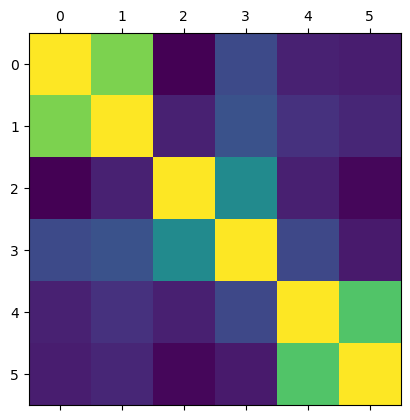

In [43]:
# Create a correlation heatmap using matplotlib

plt.matshow(sub1_filtered.corr())
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

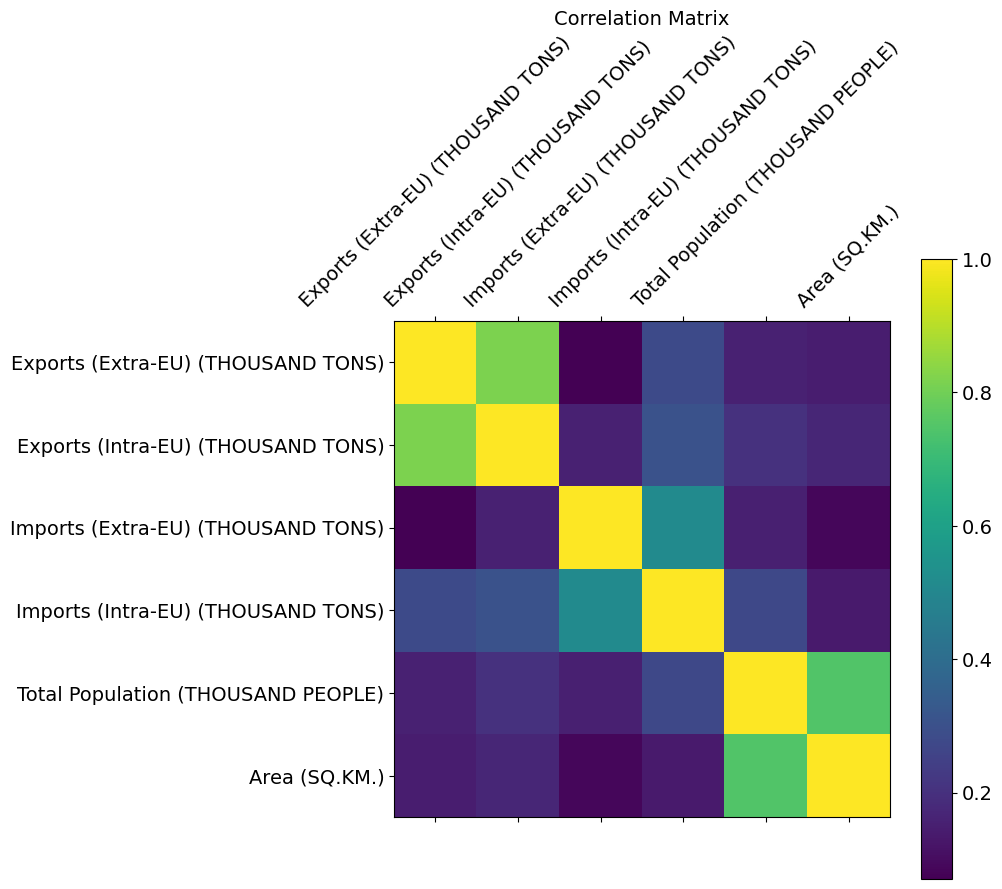

In [44]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(sub1_filtered.corr(), fignum=f.number) # type of plot
plt.xticks(range(sub1_filtered.shape[1]), sub1_filtered.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(sub1_filtered.shape[1]), sub1_filtered.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

#### Create a correlation heatmap using seaborn:

In [45]:
# create a subset of net production of livestock (BOVINE, PIGS, POULTRY, SHEEP AND GOATS)

sub2 = df[['Live exports (Extra-EU) (THOUSAND TONS (CARCASS WEIGHT EQ.))',
           'Live exports (Intra-EU) (THOUSAND TONS (CARCASS WEIGHT EQ.))',
           'Live imports (Extra-EU) (THOUSAND TONS (CARCASS WEIGHT EQ.))',
           'Live imports (Intra-EU) (THOUSAND TONS (CARCASS WEIGHT EQ.))',
           'Meat exports (Extra-EU) (THOUSAND TONS (CARCASS WEIGHT EQ.))',
           'Meat exports (Intra-EU) (THOUSAND TONS (CARCASS WEIGHT EQ.))',
           'Meat imports (Extra-EU) (THOUSAND TONS (CARCASS WEIGHT EQ.))',
           'Meat imports (Intra-EU) (THOUSAND TONS (CARCASS WEIGHT EQ.))',
           'Net production (THOUSAND HEAD)',
           'Net production (THOUSAND TONS (CARCASS WEIGHT EQ.))',
           'Total Population (THOUSAND PEOPLE)',
           'Area (SQ.KM.)']]

In [46]:
# drop null values in these columns

columns_to_dropna2 = ['Live exports (Extra-EU) (THOUSAND TONS (CARCASS WEIGHT EQ.))','Live exports (Intra-EU) (THOUSAND TONS (CARCASS WEIGHT EQ.))','Live imports (Extra-EU) (THOUSAND TONS (CARCASS WEIGHT EQ.))','Live imports (Intra-EU) (THOUSAND TONS (CARCASS WEIGHT EQ.))','Meat exports (Extra-EU) (THOUSAND TONS (CARCASS WEIGHT EQ.))','Meat exports (Intra-EU) (THOUSAND TONS (CARCASS WEIGHT EQ.))','Meat imports (Extra-EU) (THOUSAND TONS (CARCASS WEIGHT EQ.))','Meat imports (Intra-EU) (THOUSAND TONS (CARCASS WEIGHT EQ.))','Net production (THOUSAND HEAD)','Net production (THOUSAND TONS (CARCASS WEIGHT EQ.))']

In [47]:
# remove rows with null values in specific columns

sub2_filtered = sub2.dropna(subset=columns_to_dropna2)

In [48]:
sub2_filtered.shape

(2268, 12)

Text(0.5, 1.0, 'The Correlation Heatmap of Exports and Imports of Livestock')

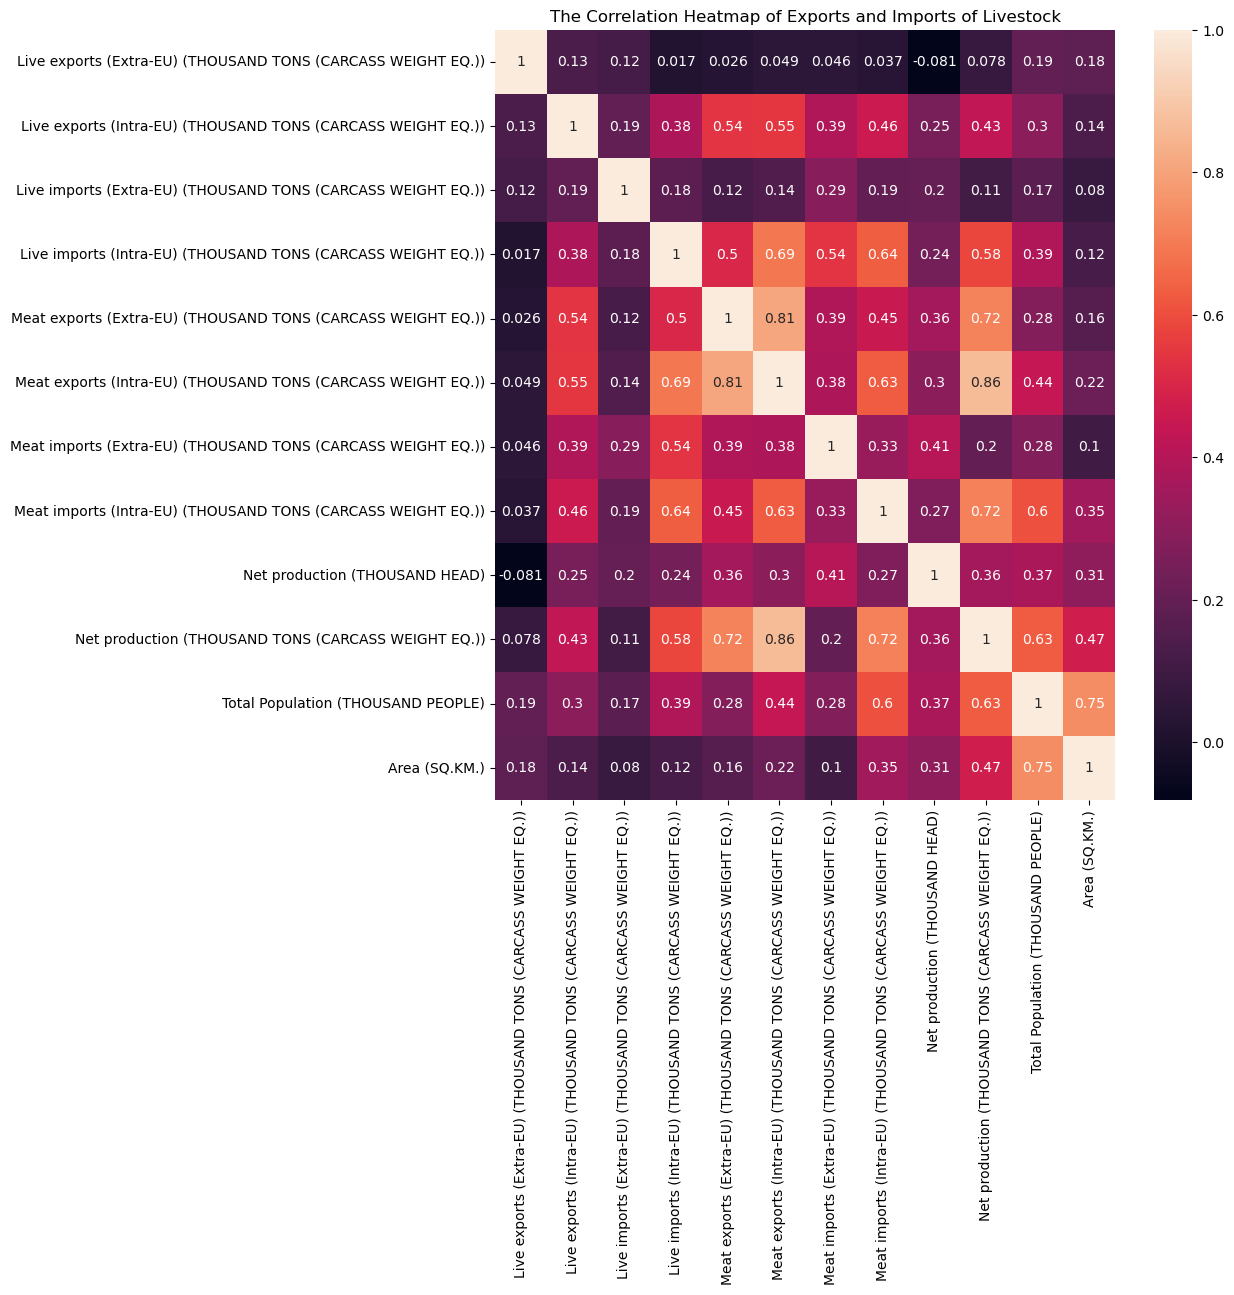

In [49]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr_sub2_filtered = sns.heatmap(sub2_filtered.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.
ax.set_title('The Correlation Heatmap of Exports and Imports of Livestock')

For the commodity of livestock including BOVINE, PIGS, POULTRY, SHEEP AND GOATS, there are 3 pairs of strong correlations: 
(1) between 'Meat export (Extra-EU)'and 'Meat export (Intra-EU)'with a 0.81 coefficient, indicating that meat export vary on the same way both within and outside the EU.
(2) between 'Total Population' and 'Area' with a 0.75 coefficient, indicating that countries with larger land areas tend to have higher populations.
(3) between 'Total Population' and 'Net production' with a 0.63 coefficient, indicating that countries with larger populations tend to have higher levels of net production.

In [50]:
# Save figure

corr_sub2_filtered.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations','heatmap_EXIM_livestock.png'), bbox_inches='tight')

In [40]:
# create a subset of export and import data of TOMATOES

sub3 = df[['Commodity','Exports (Extra-EU) (THOUSAND TONS)', 'Exports (Intra-EU) (THOUSAND TONS)','Imports (Extra-EU) (THOUSAND TONS)','Imports (Intra-EU) (THOUSAND TONS)','Total Population (THOUSAND PEOPLE)','Area (SQ.KM.)']]

In [41]:
# drop null values in these columns

columns_to_dropna3 = ['Exports (Extra-EU) (THOUSAND TONS)', 'Exports (Intra-EU) (THOUSAND TONS)','Imports (Extra-EU) (THOUSAND TONS)','Imports (Intra-EU) (THOUSAND TONS)']

In [42]:
# remove rows with null values in specific columns

sub3_filtered = sub3.dropna(subset=columns_to_dropna3)

In [43]:
# create a subset of export and import data of TOMATOES

sub3_filtered = sub3_filtered[sub3_filtered['Commodity']=='TOMATOES']

In [44]:
sub3_filtered

,Commodity,Exports (Extra-EU) (THOUSAND TONS),Exports (Intra-EU) (THOUSAND TONS),Imports (Extra-EU) (THOUSAND TONS),Imports (Intra-EU) (THOUSAND TONS),Total Population (THOUSAND PEOPLE),Area (SQ.KM.)
1117,TOMATOES,3.227088,13.033619,17.572010,146.206248,8059.591,83871
1118,TOMATOES,3.610107,19.905530,21.626479,167.255916,8098.393,83871
1119,TOMATOES,2.773789,18.605083,26.475557,180.753277,8141.815,83871
1120,TOMATOES,2.853383,22.794955,34.299829,167.505189,8200.618,83871
1121,TOMATOES,2.403822,22.471847,17.946673,178.540804,8253.451,83871
...,...,...,...,...,...,...,...
45931,TOMATOES,7.812568,19.778307,16.376560,338.624968,10110.167,450295
45932,TOMATOES,8.393544,17.441394,18.855582,344.769853,10214.429,450295
45933,TOMATOES,8.485296,17.238550,22.098080,355.088653,10321.414,450295
45934,TOMATOES,8.185620,18.955151,21.136356,335.769082,10416.525,450295


In [45]:
# drop the Commodity column

sub3_filtered.drop('Commodity',axis=1 , inplace = True)

In [46]:
# rename the columns

sub3_filtered.rename(columns={'Exports (Extra-EU) (THOUSAND TONS)':'Exports (Extra-EU)',
                              'Exports (Intra-EU) (THOUSAND TONS)':'Exports (Intra-EU)',
                              'Imports (Extra-EU) (THOUSAND TONS)':'Imports (Extra-EU)',
                              'Imports (Intra-EU) (THOUSAND TONS)':'Imports (Intra-EU)',
                              'Total Population (THOUSAND PEOPLE)':'Total Population',
                              'Area (SQ.KM.)':'Area'}, inplace = True)

In [47]:
sub3_filtered

,Exports (Extra-EU),Exports (Intra-EU),Imports (Extra-EU),Imports (Intra-EU),Total Population,Area
1117,3.227088,13.033619,17.572010,146.206248,8059.591,83871
1118,3.610107,19.905530,21.626479,167.255916,8098.393,83871
1119,2.773789,18.605083,26.475557,180.753277,8141.815,83871
1120,2.853383,22.794955,34.299829,167.505189,8200.618,83871
1121,2.403822,22.471847,17.946673,178.540804,8253.451,83871
...,...,...,...,...,...,...
45931,7.812568,19.778307,16.376560,338.624968,10110.167,450295
45932,8.393544,17.441394,18.855582,344.769853,10214.429,450295
45933,8.485296,17.238550,22.098080,355.088653,10321.414,450295
45934,8.185620,18.955151,21.136356,335.769082,10416.525,450295


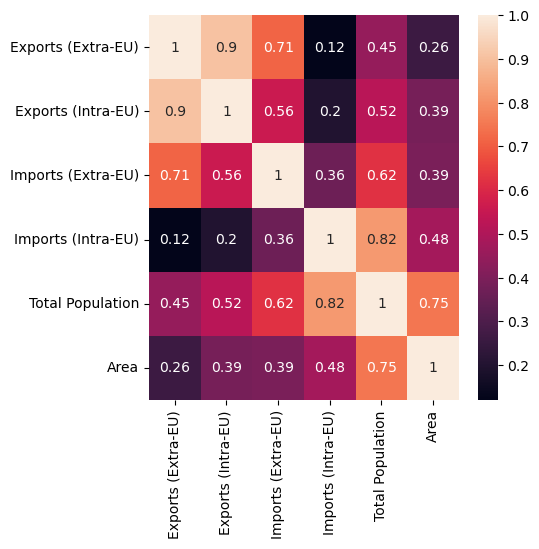

In [52]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(5,5))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr_sub3_filtered = sns.heatmap(sub3_filtered.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.
#ax.set_title('The Correlation between Tomatoes Imports and Exports')

For the commodity of tomatoes, the visualization displays a strong correlation between 'Exports (Extra-EU) and 'Exports (Intra-EU)' with a 0.9 coeffivient which means that EU countries export in both inside and outside EU. Moreover, there is also a strong corrlation between 'Total Population' and 'Imports (Intra-EU) with a 0.82 coefficient which indicating that the higher the population a country has, the higher the imports from inside the EU.

In [53]:
# Save figure

corr_sub3_filtered.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations','heatmap_EXIM_tomatoes.png'), bbox_inches='tight')

#### Scatterplots:

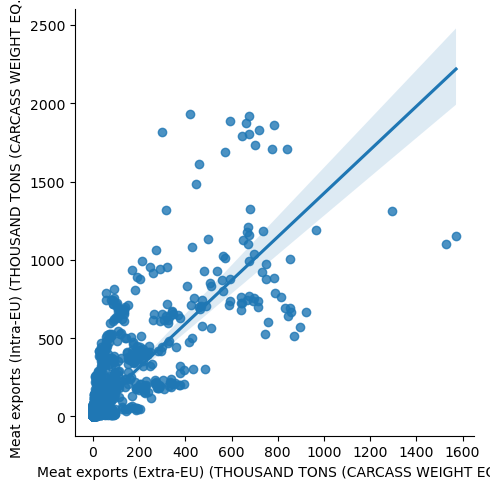

In [60]:
# Create a scatterplot for the 'Meat exports (Extra-EU) (THOUSAND TONS (CARCASS WEIGHT EQ.))' and 'Meat exports (Intra-EU) (THOUSAND TONS (CARCASS WEIGHT EQ.))' columns in seaborn

sns.lmplot(x = 'Meat exports (Extra-EU) (THOUSAND TONS (CARCASS WEIGHT EQ.))', y = 'Meat exports (Intra-EU) (THOUSAND TONS (CARCASS WEIGHT EQ.))', data = sub2_filtered)

The scatterplot displays that there is a strong positive relationship between these variables.

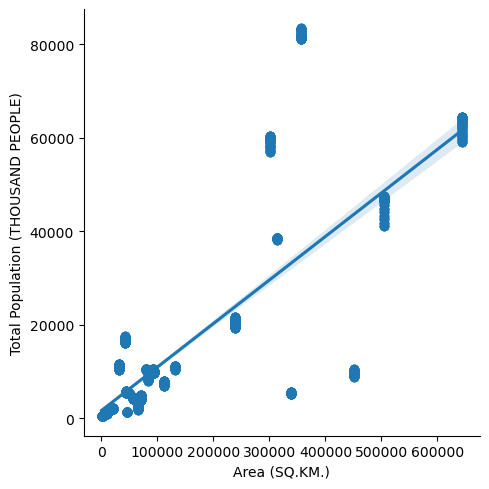

In [61]:
# Create a scatterplot for the 'Area (SQ.KM.)' and 'Total Population (THOUSAND PEOPLE)' columns in seaborn

sns.lmplot(x = 'Area (SQ.KM.)', y = 'Total Population (THOUSAND PEOPLE)', data = sub2_filtered)

The visualization displays that there is a positive relationship between the population and land area which indicating that countries with larger land areas tend to have higher populations. The plots appear to be connected by short, thick lines because the dataset includes the total population of each country from 2002 to 2022.

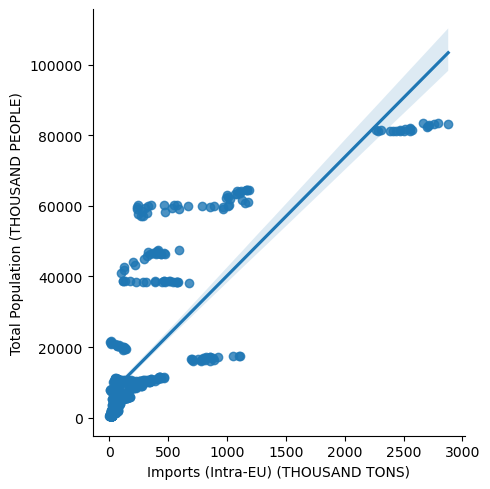

In [62]:
# Create a scatterplot for the 'Total Population (THOUSAND PEOPLE)' and 'Imports (Intra-EU) (THOUSAND TONS)' columns for subset of TOMATOES in seaborn

sns.lmplot(x = 'Imports (Intra-EU) (THOUSAND TONS)', y = 'Total Population (THOUSAND PEOPLE)', data = sub3_filtered)

The scatterplot for the commodity of tomatoes doesn't reveal a clear relationship between total population and the imports within EU as it showed the high positive correlation in the correlation heatmap above.

#### Pair Plots:

In [63]:
# select only high correlated variables

sub2_filtered_pair = sub2_filtered[['Net production (THOUSAND TONS (CARCASS WEIGHT EQ.))', 'Meat exports (Intra-EU) (THOUSAND TONS (CARCASS WEIGHT EQ.))','Meat exports (Extra-EU) (THOUSAND TONS (CARCASS WEIGHT EQ.))', 'Total Population (THOUSAND PEOPLE)']]

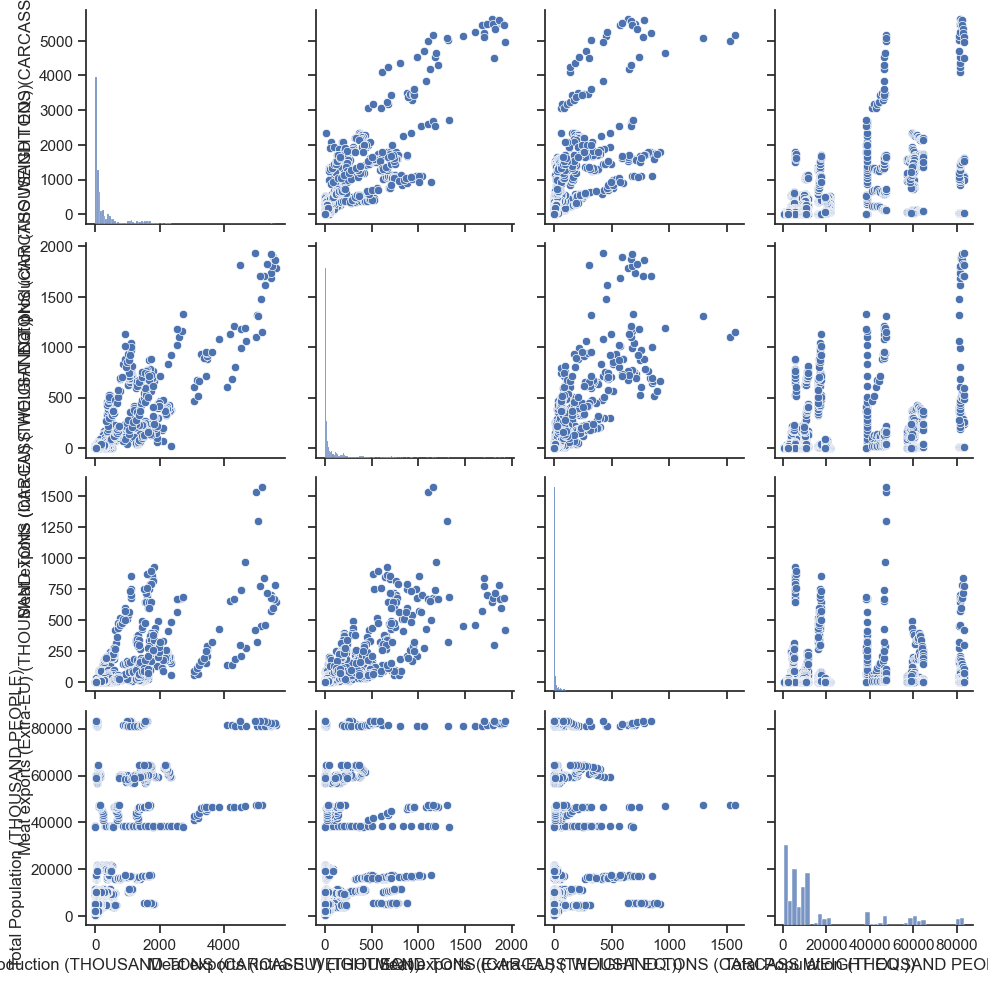

In [84]:
# Create a pair plot 

g = sns.pairplot(sub2_filtered_pair)
sns.set_context('paper', rc={"axes.labelsize":2})

#### Categorical Plots:

<Axes: xlabel='Total Population (THOUSAND PEOPLE)', ylabel='Count'>

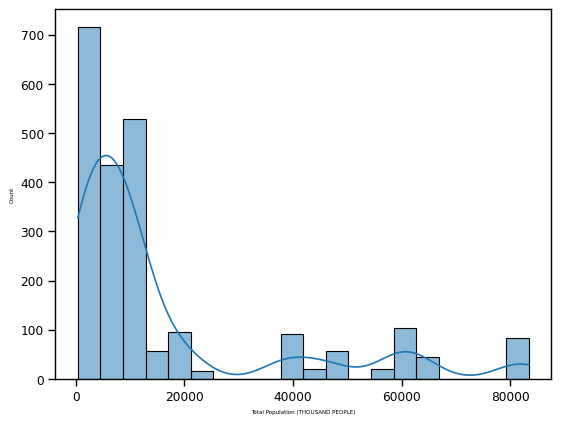

In [65]:
# Use a histogram to visualize the distribution of the variables. 
# This way, you can determine sensible categories for the price ranges. 
# You don't want to end up with too few observations in any one of the categories.
# The argument "kde" add a line that encompasses the distribution

sns.histplot(sub2_filtered['Total Population (THOUSAND PEOPLE)'], bins = 20, kde = True)

In [85]:
sub2_filtered['Total Population (THOUSAND PEOPLE)'].describe()

count     2268.000000
mean     16261.086439
std      21246.841838
min        403.547000
25%       3297.531000
50%       8407.717000
75%      16357.756000
max      83426.789000
Name: Total Population (THOUSAND PEOPLE), dtype: float64

In [86]:
sub2_filtered.loc[sub2_filtered['Total Population (THOUSAND PEOPLE)'] < 8000, 'population_size' ] = 'Low population countries'

In [87]:
sub2_filtered.loc[(sub2_filtered['Total Population (THOUSAND PEOPLE)'] >= 8000) & (sub2_filtered['Total Population (THOUSAND PEOPLE)'] < 50000), 'population_size' ] = 'Medium population countries'

In [88]:
sub2_filtered.loc[sub2_filtered['Total Population (THOUSAND PEOPLE)'] >= 50000, 'population_size' ] = 'High population countries'

In [89]:
sub2_filtered['population_size'].value_counts(dropna=False)

population_size
Low population countries       1088
Medium population countries     928
High population countries       252
Name: count, dtype: int64

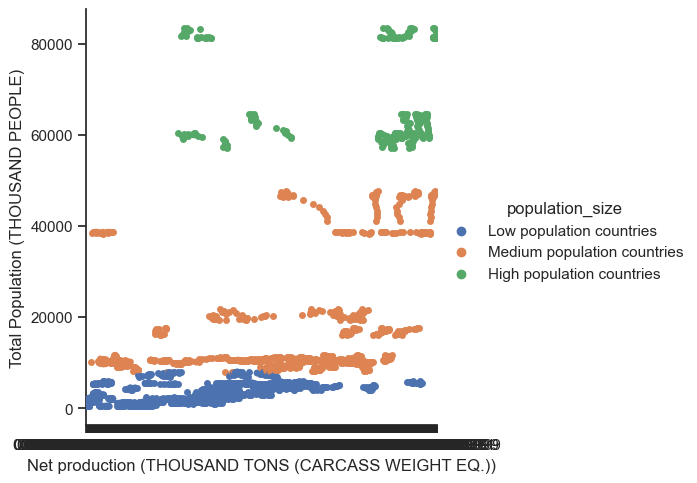

In [90]:
# Create a categorical plot in seaborn using the population_size categories created above

sns.set(style='ticks')
g = sns.catplot(x='Net production (THOUSAND TONS (CARCASS WEIGHT EQ.))', y='Total Population (THOUSAND PEOPLE)', hue='population_size', data=sub2_filtered)

In [54]:
# create a subset of export and import data of TOMATOES

sub4 = df[['Country','Commodity','Exports (Extra-EU) (THOUSAND TONS)', 'Exports (Intra-EU) (THOUSAND TONS)','Imports (Extra-EU) (THOUSAND TONS)','Imports (Intra-EU) (THOUSAND TONS)','Total Population (THOUSAND PEOPLE)','Area (SQ.KM.)']]

In [55]:
# drop null values in these columns

columns_to_dropna4 = ['Exports (Extra-EU) (THOUSAND TONS)', 'Exports (Intra-EU) (THOUSAND TONS)','Imports (Extra-EU) (THOUSAND TONS)','Imports (Intra-EU) (THOUSAND TONS)']

In [56]:
# remove rows with null values in specific columns

sub4_filtered = sub4.dropna(subset=columns_to_dropna4)

In [57]:
# create a subset of export and import data of commodity type of TOMATOES

sub4_filtered = sub4_filtered[sub4_filtered['Commodity'].isin(['DRIED TOMATOES','FRESH TOMATOES','FROZEN TOMATOES','KETCHUP','PEELED AND UNPEELED TOMATOES','TOMATO JUICE','TOMATO PASTE'])]

In [58]:
sub4_filtered

,Country,Commodity,Exports (Extra-EU) (THOUSAND TONS),Exports (Intra-EU) (THOUSAND TONS),Imports (Extra-EU) (THOUSAND TONS),Imports (Intra-EU) (THOUSAND TONS),Total Population (THOUSAND PEOPLE),Area (SQ.KM.)
252,Austria,DRIED TOMATOES,0.148200,1.476150,0.372450,11.554627,8059.591,83871
253,Austria,DRIED TOMATOES,0.081900,1.015950,0.976950,24.049350,8098.393,83871
254,Austria,DRIED TOMATOES,0.436800,1.503450,2.014350,38.610000,8141.815,83871
255,Austria,DRIED TOMATOES,0.239850,0.998400,1.246050,23.499450,8200.618,83871
256,Austria,DRIED TOMATOES,0.015600,1.417650,2.020200,24.724050,8253.451,83871
...,...,...,...,...,...,...,...,...
45910,Sweden,TOMATO PASTE,0.715725,2.860376,8.868228,139.456597,10110.167,450295
45911,Sweden,TOMATO PASTE,1.026455,1.343447,12.022087,144.634936,10214.429,450295
45912,Sweden,TOMATO PASTE,0.618795,1.408491,16.792085,157.965523,10321.414,450295
45913,Sweden,TOMATO PASTE,0.573132,1.630835,16.762955,146.095489,10416.525,450295


<Axes: xlabel='Imports (Intra-EU) (THOUSAND TONS)', ylabel='Count'>

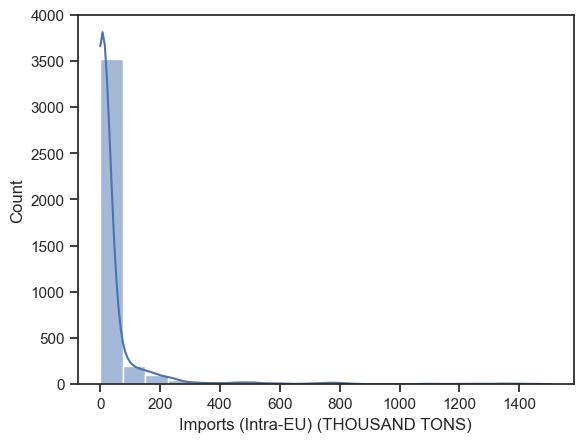

In [65]:
# Use a histogram to visualize the distribution of the variables. 
# This way, you can determine sensible categories for the price ranges. 
# You don't want to end up with too few observations in any one of the categories.
# The argument "kde" add a line that encompasses the distribution

sns.histplot(sub4_filtered['Imports (Intra-EU) (THOUSAND TONS)'], bins = 20, kde = True)

In [66]:
sub4_filtered[['Imports (Intra-EU) (THOUSAND TONS)']].describe()

,Imports (Intra-EU) (THOUSAND TONS)
count,3969.000000
mean,41.242751
std,129.045313
min,0.000000
25%,1.092000
50%,6.040800
75%,24.196439
max,1506.896054


In [67]:
sub4_filtered.loc[sub4_filtered['Imports (Intra-EU) (THOUSAND TONS)'] < 40, 'import_intraEU_volumn'] = 'Low volumn'

In [68]:
sub4_filtered.loc[(sub4_filtered['Imports (Intra-EU) (THOUSAND TONS)'] >= 40) & (sub4_filtered['Imports (Intra-EU) (THOUSAND TONS)'] < 100), 'import_intraEU_volumn' ] = 'Medium volumn'

In [69]:
sub4_filtered.loc[sub4_filtered['Imports (Intra-EU) (THOUSAND TONS)'] >= 100, 'import_intraEU_volumn'] = 'High volumn'

Text(0.5, 0.98, 'Categorical Plot of Tomatoes Imports within EU')

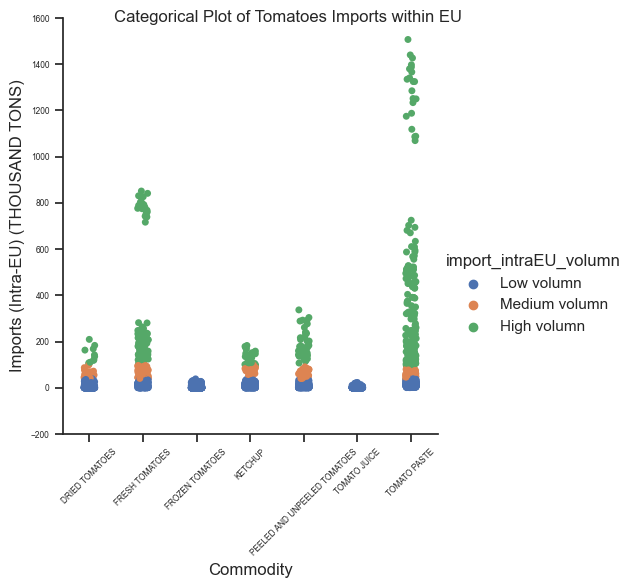

In [70]:
# Create a categorical plot in seaborn using the population_size categories created above

sns.set(style='ticks')
catplot_sub4_filtered = sns.catplot(x='Commodity', y='Imports (Intra-EU) (THOUSAND TONS)', hue='import_intraEU_volumn', data=sub4_filtered)
catplot_sub4_filtered.set_xticklabels(fontsize=6, rotation=45)
catplot_sub4_filtered.set_yticklabels(fontsize=6)
catplot_sub4_filtered.fig.suptitle('Categorical Plot of Tomatoes Imports within EU', fontsize=12)

In [71]:
# Save figure

catplot_sub4_filtered.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations','catplot_tomatoes_import_intraEU.png'), bbox_inches='tight')

<Axes: xlabel='Imports (Extra-EU) (THOUSAND TONS)', ylabel='Count'>

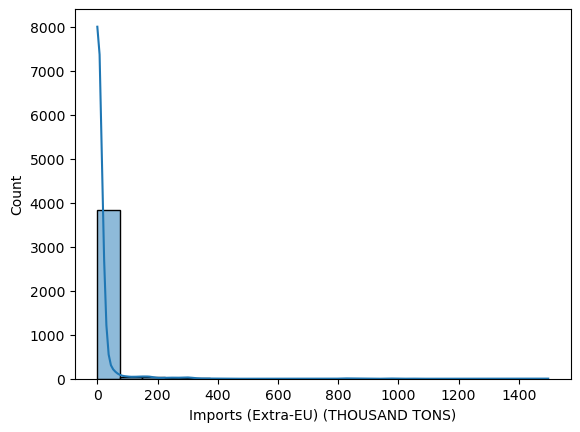

In [59]:
# Use a histogram to visualize the distribution of the variables. 
# This way, you can determine sensible categories for the price ranges. 
# You don't want to end up with too few observations in any one of the categories.
# The argument "kde" add a line that encompasses the distribution

sns.histplot(sub4_filtered['Imports (Extra-EU) (THOUSAND TONS)'], bins = 20, kde = True)

In [60]:
sub4_filtered[['Imports (Extra-EU) (THOUSAND TONS)']].describe()

,Imports (Extra-EU) (THOUSAND TONS)
count,3969.000000
mean,12.552084
std,69.141832
min,0.000000
25%,0.015600
50%,0.271328
75%,3.157557
max,1498.066754


In [72]:
sub4_filtered.loc[sub4_filtered['Imports (Extra-EU) (THOUSAND TONS)'] < 40, 'import_extraEU_volumn'] = 'Low volumn'

In [73]:
sub4_filtered.loc[(sub4_filtered['Imports (Extra-EU) (THOUSAND TONS)'] >= 40) & (sub4_filtered['Imports (Extra-EU) (THOUSAND TONS)'] < 100), 'import_extraEU_volumn' ] = 'Medium volumn'

In [74]:
sub4_filtered.loc[sub4_filtered['Imports (Extra-EU) (THOUSAND TONS)'] >= 100, 'import_extraEU_volumn'] = 'High volumn'

Text(0.5, 0.98, 'Categorical Plot of Tomatoes Imports from Outside EU')

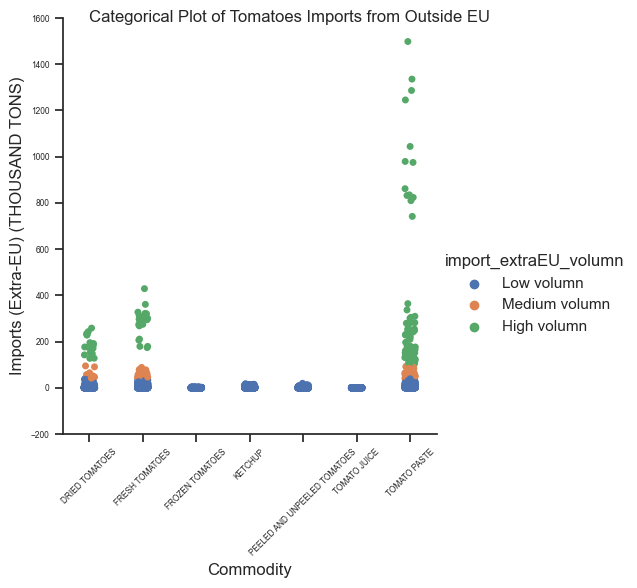

In [75]:
# Create a categorical plot in seaborn using the population_size categories created above

sns.set(style='ticks')
catplot_sub4_filtered = sns.catplot(x='Commodity', y='Imports (Extra-EU) (THOUSAND TONS)', hue='import_extraEU_volumn', data=sub4_filtered)
catplot_sub4_filtered.set_xticklabels(fontsize=6, rotation=45)
catplot_sub4_filtered.set_yticklabels(fontsize=6)
catplot_sub4_filtered.fig.suptitle('Categorical Plot of Tomatoes Imports from Outside EU', fontsize=12)

In [76]:
# Save figure

catplot_sub4_filtered.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations','catplot_tomatoes_import_extraEU.png'), bbox_inches='tight')

### 6. Revise the Questions

#### Now that I've incorporated additional data on the total population and land area of each EU country, I can formulate more specific questions to gain insights through data visualization. These questions will be explored using heatmaps, scatterplots, pair plots, and categorical plots.
###### 1. Is there a relationship between land area or population and the quantity of livestock exports and imports?
    Answer: Weak relationships are observed between these variables and commodity trade. However, the heatmap reveals a correlation between 'Total Population' and 'Net production' with a 0.63 coefficient, suggesting that countries with larger populations tend to have higher levels of net production. (Chart: The Correlation Heatmap of Exports and Imports of Livestock)
###### 2. Do exports and imports of livestock show a consistent direction, both within and outside the EU?
    Answer: There are only exports and imports of meat that have positive correlation between within and outside the EU with a 0.81 coefficient, however, the heatmap indicates that the net production has strong correlation with meat exports outside EU (a 0.72 coefficient), meat exports within EU (a 0.86 coefficient), and meat imports within EU (a 0.72 coefficient).  (Chart: The Correlation Heatmap of Exports and Imports of Livestock)
###### 3. Do countries with high populations import higher quantity of tomatoes? 
    Answer: We observe a moderate correlation between population and 'imports (Extra-EU)' with a 0.62 coefficient and a high correlation between population and 'imports (Intra-EU)' with a 0.82 coefficient. This suggests that countries with high populations tend to import larger quantities of tomatoes, with a focus on imports from within the EU rather than from countries outside the EU. (Chart: The Correlation Heatmap of Exports and Imports of Tomatoes)
###### 4. Which forms of tomato commodities are imported the most from countries outside the EU?
    Answer: Tomato paste has the highest import volumn, followed by fresh tomatoes and dried tomatoes, respectively. (Chart: Categorical Plot of Tomatoes Imports from Outside EU)

#### New questions that will explore later on 
     Do the EU countries prefer to import fruits from within the EU rather than from outside the EU?


### 6. Define Hypotheses

    "If countries have a high quantity of tomatoes exports, then they have a low quantity of tomatoes imports."
    "If countries have a high quantity of tomatoes imports within the EU, then they have a low quantity of tomatoes imports from outside the EU."